# Test de différentes façon de faire du pré-traitement de l'image


## Installation des dépendances


In [1]:
%pip install opencv-python
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Importation des dépendances


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time

## Fonctions communes


In [3]:
def save_image(image: np.array, filename: str) -> None:
    """
    Permet de sauvegarder une image
    
    :param image: l'image à sauvegarder
    :param filename: le nom du fichier dans lequel sauvegarder l'image
    """
    cv2.imwrite(filename, image)

In [4]:
def print_image(image: np.array, title: str, time: float) -> None:
    """
    Permet d'afficher une image avec un titre
    
    :param image: l'image à afficher
    :param title: le titre de l'image
    """
    
    plt.figure(figsize=(5, 5))
    plt.axis("off") 
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"{title} : {time * 1000:.2f} ms")
    plt.show()

## Chargement de l'image de base


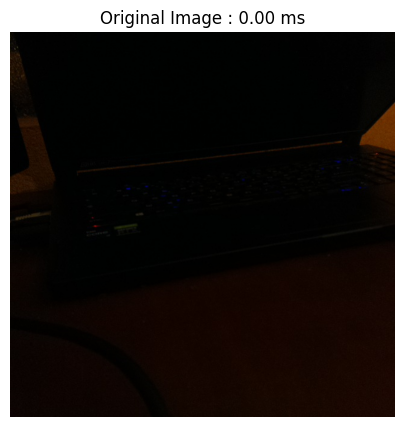

In [5]:
image = cv2.imread("image.jpg")

print_image(image, "Original Image", 0)

## CLAHE (Contrast Limited Adaptive Histogram Equalization)


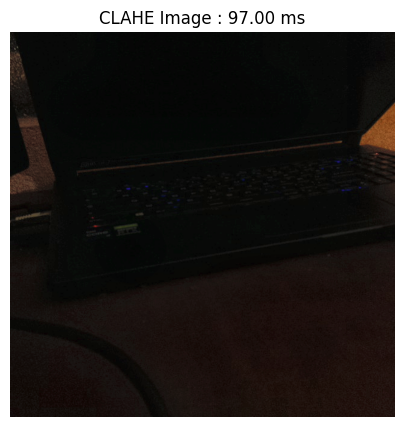

In [6]:
start_time = time.time()

lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
L, a, b = cv2.split(lab_image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
L_eq = clahe.apply(L)
lab_eq = cv2.merge((L_eq, a, b))
color_image_clahe = cv2.cvtColor(lab_eq, cv2.COLOR_Lab2BGR)

clahe_time = time.time() - start_time

save_image(color_image_clahe, "clahe_image.jpg")
print_image(color_image_clahe, "CLAHE Image", clahe_time)

## Approche HSV


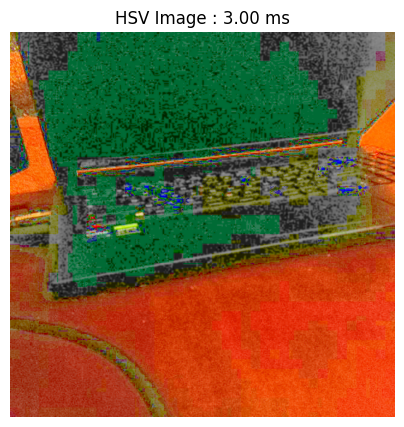

In [7]:
start_time = time.time()

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv_image)
V_eq = cv2.equalizeHist(V)
V_eq = cv2.GaussianBlur(V_eq, (5, 5), 0)
hsv_eq = cv2.merge((H, S, V_eq))
color_image_hsv = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2BGR)

hsv_time = time.time() - start_time

save_image(color_image_hsv, "hsv_image.jpg")
print_image(color_image_hsv, "HSV Image", hsv_time)

## Histogram Stretching


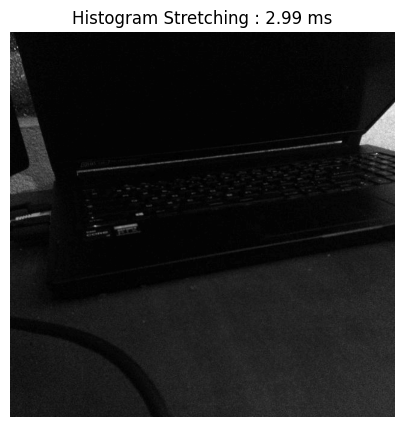

In [8]:
start_time = time.time()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
min_val = np.min(gray)
max_val = np.max(gray)
stretched = ((gray - min_val) / (max_val - min_val) * 255).astype("uint8")

stretched_time = time.time() - start_time

save_image(stretched, "histogram_stretch.jpg")
print_image(stretched, "Histogram Stretching", stretched_time)

## Réduction du bruit dans l'image


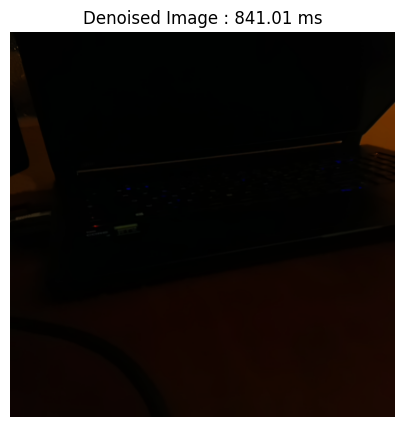

In [9]:
start_time = time.time()

denoised = cv2.fastNlMeansDenoisingColored(image, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

denoised_time = time.time() - start_time

save_image(denoised, "denoised_image.jpg")
print_image(denoised, "Denoised Image", denoised_time)

## Filtrage et Boost de Contraste


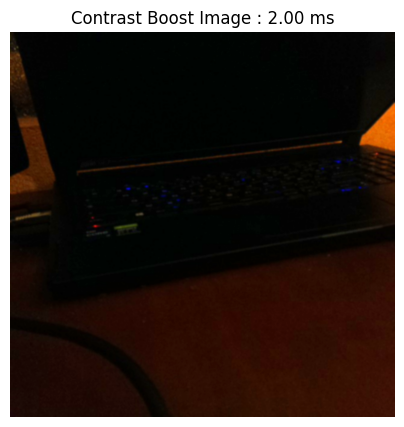

In [10]:
start_time = time.time()

blurred = cv2.GaussianBlur(image, (5, 5), 0)
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
enhanced_hsv = cv2.merge((h, s, v))
enhanced_image = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)

enhanced_time = time.time() - start_time

save_image(enhanced_image, "contrast_boost_image.jpg")
print_image(enhanced_image, "Contrast Boost Image", enhanced_time)

## Toutes les images


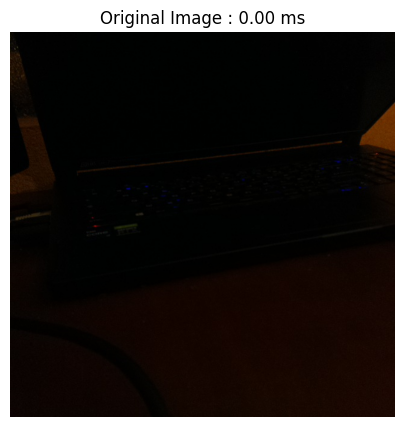

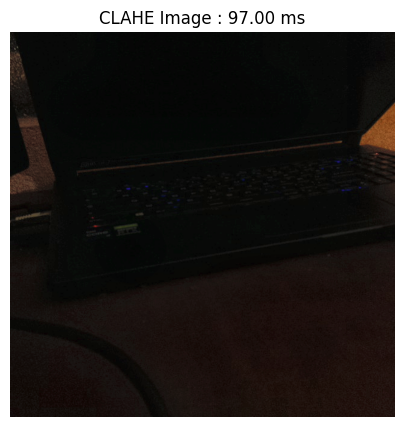

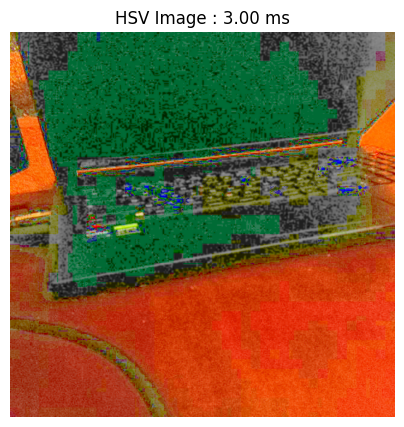

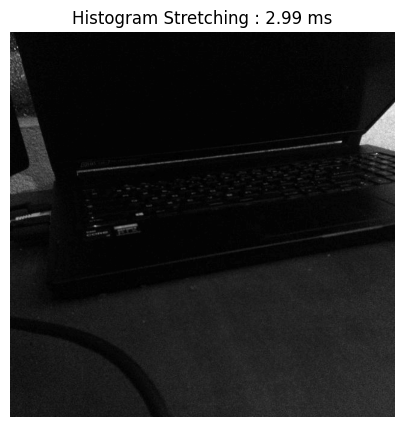

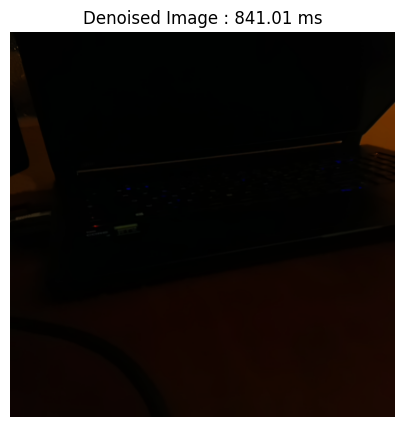

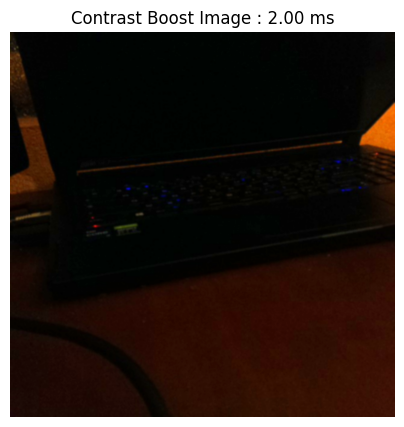

In [11]:
print_image(image, "Original Image", 0)
print_image(color_image_clahe, "CLAHE Image", clahe_time)
print_image(color_image_hsv, "HSV Image", hsv_time)
print_image(stretched, "Histogram Stretching", stretched_time)
print_image(denoised, "Denoised Image", denoised_time)
print_image(enhanced_image, "Contrast Boost Image", enhanced_time)